**Colab'ı Drive'a bağlama**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls 

gdrive	sample_data


In [3]:
%cd '/content/gdrive/My Drive/ysa'

/content/gdrive/My Drive/ysa


In [4]:
!ls

mushrooms.csv  ysa_proje.ipynb


**Gerekli Kütüphanelerin Tanımlanması**



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import csv
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.metrics import confusion_matrix
from matplotlib import *
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
import seaborn as sn


In [6]:
mushrooms_data = pd.read_csv ('mushrooms.csv')
print(len(mushrooms_data))    #uzunluğu hesaplama
#mushrooms_data #dosyayı yazdırma

8124


**Veri Setimi X ve y Olarak Ayırma**

X : Şapka Şekli, Şapka Yüzeyi, Şapka Rengi, Çürükler, Koku, Solungaç Eki, Solungaç Aralığı, Solungaç Boyutu, Solungaç Rengi, Sap Eki, Sap Kökü, Halkanın Üzerindeki Sap Yüzeyi, Halkanın Altındaki SAp Yüzeyi, Halkanın Üzerindeki Sap REngi, Halkanın Altındaki Sap Rengi, Peçe Tipi, Peçe Rengi, Halkanın Numarası, Halkanın Tipi, Spor Baskı Rengi, Popülasyon, Habitat

y : Class

In [7]:
X=mushrooms_data.drop('class',axis=1) 
y=mushrooms_data['class']

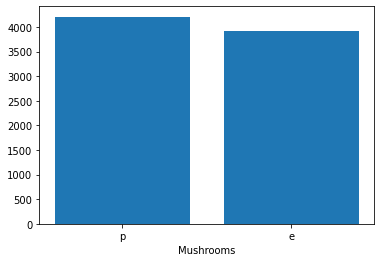

In [8]:
star_clas = y.unique()
values = y.value_counts()

plt.bar(star_clas, values)
plt.xlabel("Mushrooms" )
plt.show()

**VERİ SETİNDEKİ HARFLERİ SAYIYA ÇEVİRME**

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [ ]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


**X'in MinMax ile Ölçeklendirilmesi**


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)

In [ ]:
scaler.data_max_

array([ 5.,  3.,  9.,  1.,  8.,  1.,  1.,  1., 11.,  1.,  4.,  3.,  3.,
        8.,  8.,  0.,  3.,  2.,  4.,  8.,  5.,  6.])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
Y=enc.fit_transform(y[:,np.newaxis]).toarray()

In [ ]:
Y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [ ]:
X.shape

(8124, 22)

In [ ]:
n_feat = X.shape[1]
n_class= Y.shape[1]


**Veri Setinin %30'u Test, %70'ı Train için Ayrılmıştır**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size = 0.30)
X_test, X_val, y_test,y_val = train_test_split(X_test, y_test, test_size = 0.40)

In [ ]:
X_train.shape


(5686, 22)

In [ ]:

X_test.shape


(1462, 22)

In [ ]:
X_val.shape

(976, 22)

**Model Oluşturma**

In [ ]:
def x_model(name, hidden_l,op):
  model = Sequential(name = name )
  model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
  for a in range(hidden_l):
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(n_class, kernel_initializer = 'uniform', activation = 'softmax'))
  model.compile(optimizer = op, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
n_class

2

**Oluşturulan Modelin Eğitilmesi**

In [ ]:
def run(name,hidden_l,op):
    batch_s=12
    epochs=100
    model=x_model(name,hidden_l,op)
    t_history = model.fit(X_train, y_train, batch_size=batch_s, epochs=epochs, verbose=0, validation_data=(X_val, y_val))
    
    return t_history , model


**Çıkan Sonuçları Grafikte Gösterme**

In [ ]:
def plt_history(history,model_name):
    fig, (cx1, cx2) = plt.subplots(2, figsize=(8, 6))

    cx1.plot(history.history['loss'])
    cx1.plot(history.history['val_loss'])


    cx2.plot(history.history['accuracy'])
    cx2.plot(history.history['val_accuracy'])

    
    cx1.set_ylabel('loss')
    cx1.legend(['train', 'test'], loc='upper left')

    cx2.set_ylabel('accuracy')
    cx2.set_xlabel('epoch')
    cx1.legend(['Training', 'Validation'], loc='upper left')
    plt.savefig(model_name+'_los_acc')
  


In [ ]:
Y_test = np.argmax(y_test, axis=1)

**LEARNING RATE DEĞİŞTİRME(HIDDEN LAYER SABIT)**

**DENEME 1**

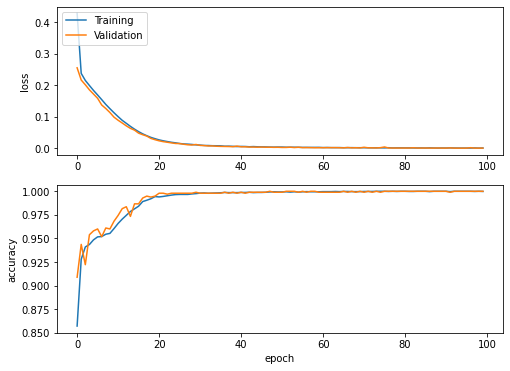

In [ ]:
name='model1'
op = keras.optimizers.Adam(learning_rate=0.001)
hidden_l=0

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

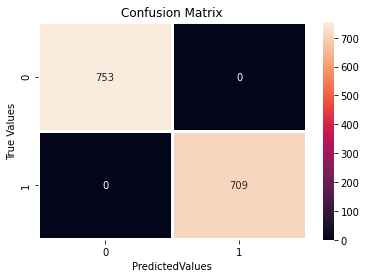

In [ ]:

cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

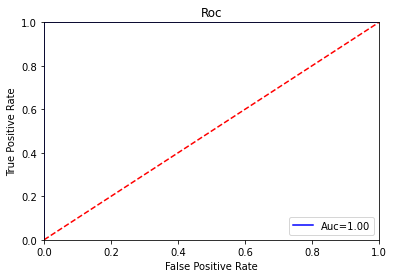

In [ ]:
fpr, tpr, threshold= metrics.roc_curve(Y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Roc')
plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

**DENEME 2**

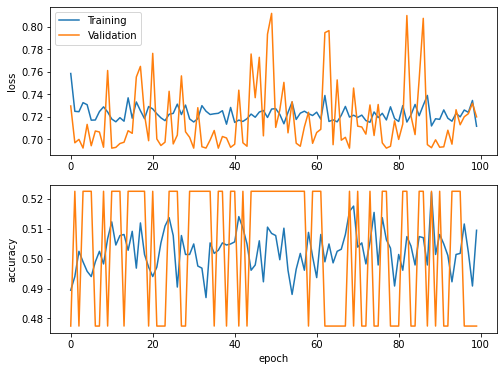

In [ ]:
name='model1'
op = keras.optimizers.Adam(learning_rate=0.5)
hidden_l=0

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

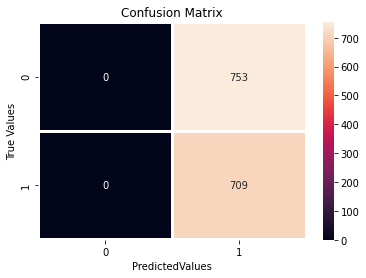

In [ ]:

cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

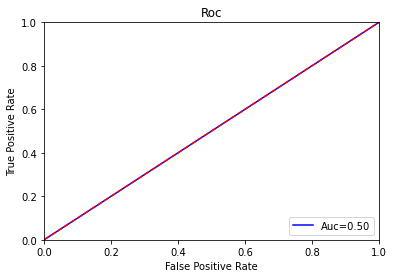

In [ ]:
fpr, tpr, threshold= metrics.roc_curve(Y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Roc')
plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

**DENEME 3**

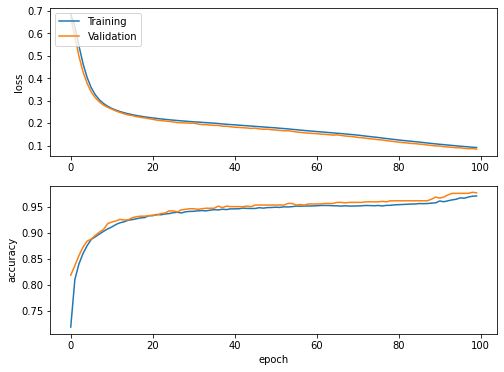

In [ ]:
name='model1'
op = keras.optimizers.Adam(learning_rate=0.0001)
hidden_l=0

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

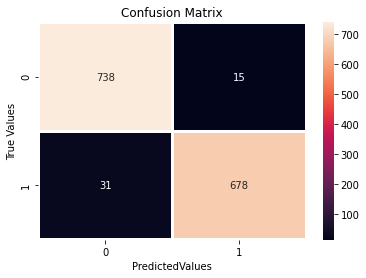

In [ ]:

cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

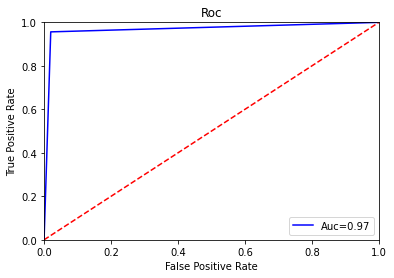

In [ ]:
fpr, tpr, threshold= metrics.roc_curve(Y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Roc')
plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

**HİDDEN LAYER DEĞİŞTİRME (LEARNING RATE SABİT)**

**DENEME 1**

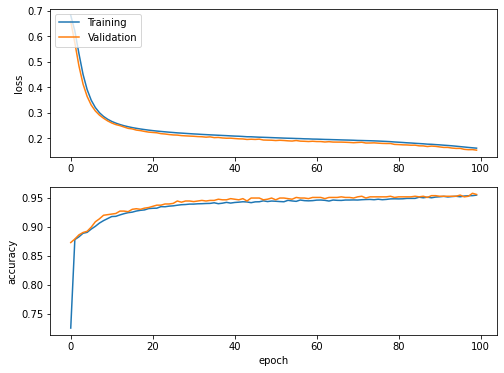

In [ ]:
name='model1'
op = keras.optimizers.Adam(learning_rate=0.0001)
hidden_l=0

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

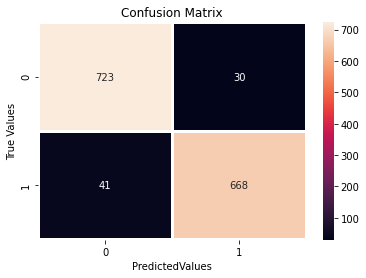

In [ ]:

cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

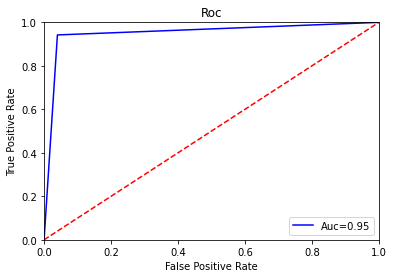

In [ ]:
fpr, tpr, threshold= metrics.roc_curve(Y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Roc')
plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

**DENEME 2**

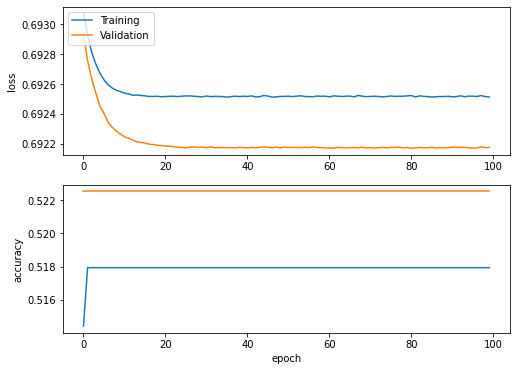

In [ ]:
name='model1'
op = keras.optimizers.Adam(learning_rate=0.0001)
hidden_l=7


history,model = run(name,hidden_l,op) 
plt_history(history,model.name)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

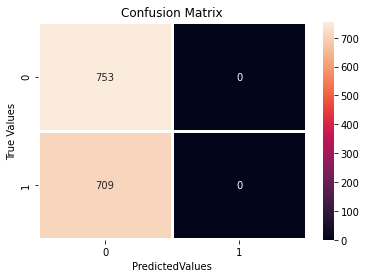

In [ ]:

cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

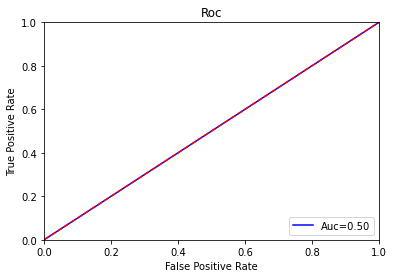

In [ ]:
fpr, tpr, threshold= metrics.roc_curve(Y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Roc')
plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

**DENEME 3**

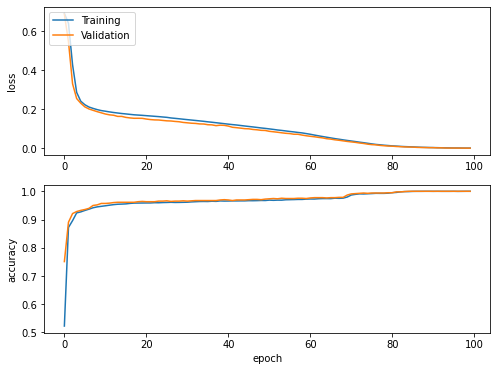

In [ ]:
name='model1'
op = keras.optimizers.Adam(learning_rate=0.0001)
hidden_l=3

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

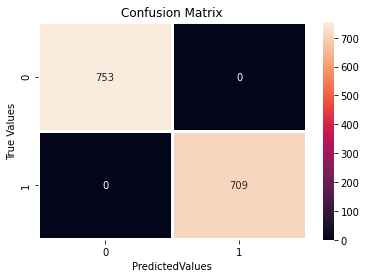

In [ ]:

cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

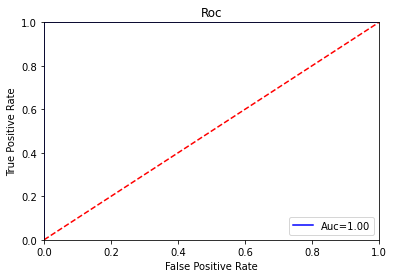

In [ ]:
fpr, tpr, threshold= metrics.roc_curve(Y_test, y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Roc')
plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()